In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

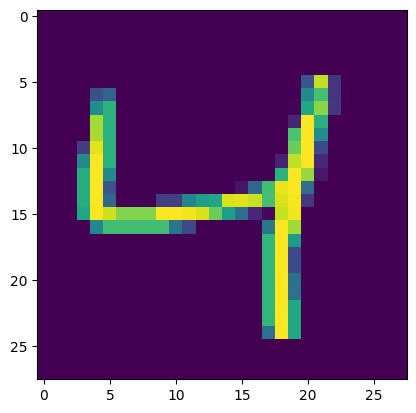

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
#we need to normalize the things because neural works or train better when values are scaled
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))#first we convert 2d array to 1d
model.add(Dense(128,activation='relu'))#we dont need to specify input because flatten output will be automatically input
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
#sparse_categorical_crossentropy is when we dont have output one hot encoded and are present in int values rep. class


In [11]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 12s 4ms/step - loss: 0.2925 - accuracy: 0.9159 - val_loss: 0.1504 - val_accuracy: 0.9594
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1241 - accuracy: 0.9624 - val_loss: 0.1200 - val_accuracy: 0.9649
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0857 - accuracy: 0.9743 - val_loss: 0.1121 - val_accuracy: 0.9677
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0615 - accuracy: 0.9809 - val_loss: 0.0933 - val_accuracy: 0.9741
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0487 - accuracy: 0.9844 - val_loss: 0.1001 - val_accuracy: 0.9715
Epoch 6/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0390 - accuracy: 0.9870 - val_loss: 0.0958 - val_accuracy: 0.9728
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0919 - val_accuracy

In [12]:
y_prob = model.predict(X_test)
y_prob #it give probability of every digit

313/313 [==============================] - 1s 2ms/step


array([[2.64501870e-17, 9.54159428e-16, 4.82844971e-12, ...,
        1.00000000e+00, 3.68109666e-16, 1.31714067e-11],
       [2.36160048e-17, 1.10311390e-07, 9.99999881e-01, ...,
        1.98512426e-20, 7.80796360e-17, 7.90074048e-28],
       [2.79433032e-09, 9.99995828e-01, 1.33717961e-07, ...,
        3.46899810e-07, 3.64128573e-06, 1.45181419e-11],
       ...,
       [2.28317998e-30, 1.28398295e-20, 7.17034041e-27, ...,
        2.30990455e-18, 2.80608470e-18, 3.99682440e-11],
       [1.97977303e-25, 4.23949751e-26, 2.93848853e-24, ...,
        3.92844340e-13, 5.67941365e-13, 4.36038606e-23],
       [3.03394727e-20, 5.83774634e-27, 3.96591827e-18, ...,
        5.26877329e-28, 2.21493222e-18, 4.61440044e-16]], dtype=float32)

In [16]:
y_pred = y_prob.argmax(axis=1) #we take index of max value

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9744

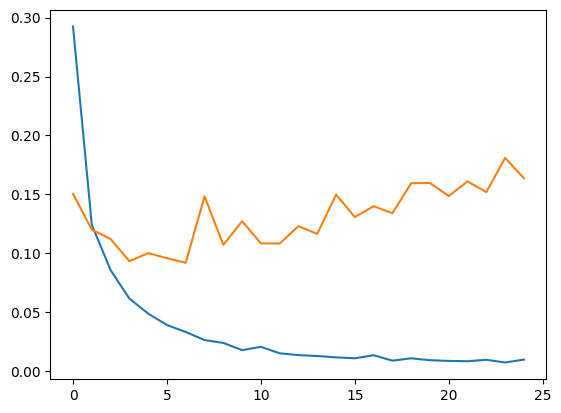

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

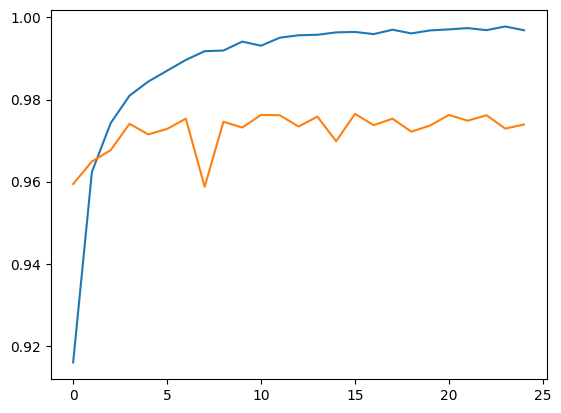

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

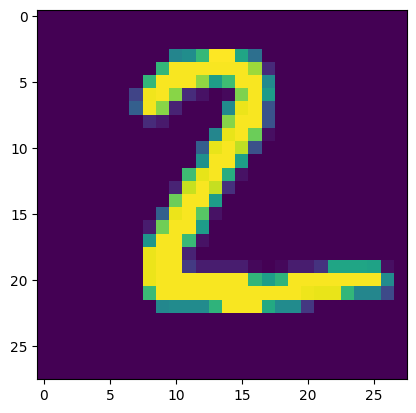

In [19]:
plt.imshow(X_test[1])

In [21]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1) #because we are giving 1 image so (1,28,28)

1/1 [==============================] - 0s 72ms/step


array([2])